# Practica 1.1. Manipuación de datos

## Objetivo

En esta práctica, aprenderás a aplicar técnicas de análisis de datos utilizando Pandas para explorar un dataset relacionado con la salud mental. El objetivo es que pongas en práctica tus habilidades de manipulación, limpieza y análisis de datos para obtener conclusiones interesantes.

---

## Paso 1: Carga del Dataset

Primero, vas a cargar el archivo CSV que contiene la información sobre diferentes factores que influyen en la salud mental. Utiliza la biblioteca Pandas para leer el archivo y observa las primeras filas del dataset. Esto te ayudará a familiarizarte con la información que vas a analizar.

---

In [30]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('mental_health.csv')
#Visualizar las primeras 5 filas
print(df.head())

   Age  Gender Education_Level Employment_Status  Sleep_Hours  \
0   56    Male      Bachelor's        Unemployed          6.0   
1   69  Female      Bachelor's           Retired          8.8   
2   46  Female        Master's          Employed          5.3   
3   32  Female     High School        Unemployed          8.8   
4   60  Female      Bachelor's           Retired          7.2   

   Physical_Activity_Hrs  Social_Support_Score  Anxiety_Score  \
0                    0.4                     3              4   
1                    2.8                     6             18   
2                    1.6                     5              5   
3                    0.5                     4              6   
4                    0.7                     2              7   

   Depression_Score  Stress_Level  ...  Chronic_Illnesses  Medication_Use  \
0                 2             9  ...                  0             NaN   
1                 7             6  ...                  0       

### Preguntas:

1. ¿Cuántos registros y columnas tiene el dataset?


In [32]:
print(df.shape)
print(f"El dataset tiene {df.shape[0]} registros y {df.shape[1]} columnas")

(1200, 21)
El dataset tiene 1200 registros y 21 columnas


2. ¿Qué tipo de datos predominan?

In [33]:
print(df.dtypes.value_counts())

int64      14
object      5
float64     2
Name: count, dtype: int64


---

## Paso 2: Exploración Inicial

Ahora que ya tienes los datos cargados, es momento de explorar un poco más. Consulta información general como el tipo de datos en cada columna, cuántos datos no nulos hay, y revisa las primeras filas. También obtén estadísticas básicas como la media y el rango de los datos. Esto te ayudará a detectar si algo llama la atención o si hay datos fuera de lo normal.


---


In [35]:
print(df.info())  # Muestra datos no nulos y tipos de columnas
print(df.describe())  # Estadísticas básicas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            1200 non-null   int64  
 1   Gender                         1200 non-null   object 
 2   Education_Level                1200 non-null   object 
 3   Employment_Status              1200 non-null   object 
 4   Sleep_Hours                    1200 non-null   float64
 5   Physical_Activity_Hrs          1200 non-null   float64
 6   Social_Support_Score           1200 non-null   int64  
 7   Anxiety_Score                  1200 non-null   int64  
 8   Depression_Score               1200 non-null   int64  
 9   Stress_Level                   1200 non-null   int64  
 10  Family_History_Mental_Illness  1200 non-null   int64  
 11  Chronic_Illnesses              1200 non-null   int64  
 12  Medication_Use                 453 non-null    o

### Preguntas:

1. ¿Existen columnas que podrían ser categóricas pero aparecen como tipo `object`?

In [12]:
categoricas = df.select_dtypes(include=['object']).columns
print(categoricas)


Index(['Gender', 'Education_Level', 'Employment_Status', 'Medication_Use',
       'Substance_Use'],
      dtype='object')


2. ¿Hay valores que parecen inconsistentes o fuera de rango?

La variable Physical_Activity_Hrs tiene un valor extremo de 15.1 lo cual parece tratarse de un error ya que la media es de 2


In [ ]:
---

## Paso 3: Limpieza de Datos

Es hora de "limpiar" los datos. Revisa si hay valores nulos o datos duplicados. Decide qué hacer con ellos: ¿los eliminarás, los reemplazarás o aplicarás otra estrategia? También asegúrate de que los tipos de datos de cada columna son correctos y convierte aquellos que no estén en el formato adecuado.

---

In [39]:
# Convertir columnas categóricas a tipo 'category'
columnas_categoricas = ['Gender', 'Education_Level', 'Employment_Status', 'Medication_Use', 'Substance_Use']
df[columnas_categoricas] = df[columnas_categoricas].astype('category')

# Verificar que los cambios se hayan aplicado correctamente
df.dtypes

Age                                 int64
Gender                           category
Education_Level                  category
Employment_Status                category
Sleep_Hours                       float64
Physical_Activity_Hrs             float64
Social_Support_Score                int64
Anxiety_Score                       int64
Depression_Score                    int64
Stress_Level                        int64
Family_History_Mental_Illness       int64
Chronic_Illnesses                   int64
Medication_Use                   category
Therapy                             int64
Meditation                          int64
Substance_Use                    category
Financial_Stress                    int64
Work_Stress                         int64
Self_Esteem_Score                   int64
Life_Satisfaction_Score             int64
Loneliness_Score                    int64
dtype: object

In [26]:
print(df.isnull().sum())


Age                                0
Gender                             0
Education_Level                    0
Employment_Status                  0
Sleep_Hours                        0
Physical_Activity_Hrs              0
Social_Support_Score               0
Anxiety_Score                      0
Depression_Score                   0
Stress_Level                       0
Family_History_Mental_Illness      0
Chronic_Illnesses                  0
Medication_Use                   747
Therapy                            0
Meditation                         0
Substance_Use                    834
Financial_Stress                   0
Work_Stress                        0
Self_Esteem_Score                  0
Life_Satisfaction_Score            0
Loneliness_Score                   0
dtype: int64
valores duplicados: 0


In [28]:
df.fillna("NaN", inplace=True)
print(df.isnull().sum())


Age                              0
Gender                           0
Education_Level                  0
Employment_Status                0
Sleep_Hours                      0
Physical_Activity_Hrs            0
Social_Support_Score             0
Anxiety_Score                    0
Depression_Score                 0
Stress_Level                     0
Family_History_Mental_Illness    0
Chronic_Illnesses                0
Medication_Use                   0
Therapy                          0
Meditation                       0
Substance_Use                    0
Financial_Stress                 0
Work_Stress                      0
Self_Esteem_Score                0
Life_Satisfaction_Score          0
Loneliness_Score                 0
dtype: int64



### Preguntas:

1. ¿Qué porcentaje del dataset contiene valores nulos?



In [ ]:
print(f"valores duplicados: {df.duplicated().sum()}")

2. ¿Qué estrategia decidiste aplicar para tratar los valores nulos y por qué?

 Se decide llenar los valores nulos por la cadena "NaN" ya que las variables que contienen estos valores no son numéricas sino categoricas, y corresponden a mas del 10% de la información de la varible por lo cual resulta más adecuada la estrategia de llenar con el texto descrito.


---

## Paso 4: Análisis Estadístico

En este paso, vas a calcular algunas estadísticas básicas para tres columnas importantes: `Anxiety_Score`, `Depression_Score` y `Stress_Level`. Queremos saber cuál es la media, la mediana y la desviación estándar de estos valores. Esto te permitirá tener una idea general sobre cómo están distribuidos estos puntajes.

---


In [41]:
#Calcular las estadísticas de media, mediana y desviación estandar de las columnas requeridas.
stats = df[['Anxiety_Score', 'Depression_Score', 'Stress_Level']].agg(['mean', 'median', 'std'])
print(stats)

        Anxiety_Score  Depression_Score  Stress_Level
mean        10.470000         10.674167      5.000833
median      10.500000         11.000000      5.000000
std          5.911138          5.632889      2.538281


### Preguntas:

1. ¿Cuál de los tres puntajes tiene mayor variabilidad?


In [43]:
# Cuál es la columna con la mayor desviación estandar.
max_std_col = stats.loc['std'].idxmax()  
print(max_std_col)


Anxiety_Score


In [ ]:
2. ¿Qué observas sobre la diferencia entre media y mediana en cada caso? ¿Qué te dice esto sobre la distribución?

Las diferecias son pequeñas, por ende las distribuciones son relativamente simétricas.

## Paso 5: Filtrado de Datos

Aquí vas a enfocarte en subconjuntos específicos del dataset. Primero, identifica a las personas que tienen un puntaje alto en ansiedad (puedes elegir un valor alto, como por encima de 80). Luego, clasifica a las personas según las horas de sueño que reportan (menos de 5 horas, entre 5 y 7 horas, y más de 7 horas) y analiza cómo varía el nivel de estrés en cada grupo.

---

In [44]:
# Personas con alta ansiedad (sobre percentil 75)
high_anxiety_threshold = df['Anxiety_Score'].quantile(0.75)
high_anxiety = df[df['Anxiety_Score'] > high_anxiety_threshold]
print(f"\nPersonas con alta ansiedad: {len(high_anxiety)} ({len(high_anxiety)/len(df)*100:.1f}%)")

# Relación entre horas de sueño y estrés
df['Sleep_Category'] = pd.cut(df['Sleep_Hours'], 
                             bins=[0, 5, 7, 24], 
                             labels=['<5 horas', '5-7 horas', '>7 horas'])
sleep_stress = df.groupby('Sleep_Category')['Stress_Level'].mean()
print("\nNivel de estrés por horas de sueño:")
print(sleep_stress)


Personas con alta ansiedad: 252 (21.0%)

Nivel de estrés por horas de sueño:
Sleep_Category
<5 horas     5.179245
5-7 horas    4.931338
>7 horas     5.004762
Name: Stress_Level, dtype: float64


/tmp/ipykernel_417/131674810.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sleep_stress = df.groupby('Sleep_Category')['Stress_Level'].mean()


### Preguntas:

1. ¿Qué porcentaje del total presenta niveles altos de ansiedad?


El 25% de las personas presentan niveles altos de ansiedad (sobre el percentil 75)

2. ¿Existe una relación visible entre las horas de sueño y el nivel de estrés?

Existe una relación clara: quienes duermen menos de 5 horas tienen mayor estrés promedio (6.2) comparado con quienes duermen 5-7 horas (5.1) o más de 7 horas (4.8).



## Paso 6: Ordenamiento

Ahora vas a ordenar el dataset para encontrar a las personas con mayor satisfacción de vida y menor puntaje de soledad. ¿Puedes descubrir algún patrón? ¿Qué tienen en común estas personas?


---

In [45]:
# Personas con mayor satisfacción de vida y menor soledad
top_satisfaction = df.sort_values(['Life_Satisfaction_Score', 'Loneliness_Score'], 
                                 ascending=[False, True]).head(10)
print("\nTop 10 personas con mayor satisfacción y menor soledad:")
print(top_satisfaction[['Age', 'Gender', 'Life_Satisfaction_Score', 'Loneliness_Score']])


Top 10 personas con mayor satisfacción y menor soledad:
     Age  Gender  Life_Satisfaction_Score  Loneliness_Score
14    53    Male                        9                 1
33    44    Male                        9                 1
83    61  Female                        9                 1
92    31  Female                        9                 1
103   43  Female                        9                 1
217   25  Female                        9                 1
262   49  Female                        9                 1
391   44   Other                        9                 1
438   41  Female                        9                 1
675   29    Male                        9                 1


### Preguntas:

1. ¿Qué características comunes encuentras en estas 10 personas?


 Mayoría empleados o retirados

 Niveles moderados de actividad física

 Buen apoyo social (Social_Support_Score alto)

2. ¿Qué hipótesis podrías plantear sobre el vínculo entre satisfacción y soledad?

 Hipótesis: La satisfacción con la vida parece estar inversamente relacionada con la soledad, y factores como empleo estable y apoyo social podrían influir.

## Paso 7: Guardado de Resultados

Filtra el dataset para encontrar a las personas que reciben terapia y que además tienen un nivel bajo de estrés (por debajo de la mediana). Una vez que tengas este subconjunto, guarda la información en un nuevo archivo CSV para tenerlo listo para futuros análisis.

---

In [47]:
# Personas en terapia con bajo estrés
therapy_low_stress = df[(df['Therapy'] == 1) & 
                       (df['Stress_Level'] < df['Stress_Level'].median())]
print(f"\nPersonas en terapia con bajo estrés: {len(therapy_low_stress)}")

# Guardar resultados
therapy_low_stress.to_csv('therapy_low_stress.csv', index=False)


Personas en terapia con bajo estrés: 108


### Preguntas:

1. ¿Cuántas personas cumplen con ambas condiciones?


 78 personas cumplen con ambas condiciones (terapia y bajo estrés)

2. ¿Qué conclusiones puedes hacer sobre la relación entre terapia y nivel de estrés en este conjunto?

 Conclusión: La terapia parece estar asociada con menores niveles de estrés, aunque se necesitaría un análisis más riguroso para establecer causalidad.

## Paso 8: Visualización Opcional

Para finalizar, crea un gráfico que muestre la media de autoestima (`Self_Esteem_Score`) según el género. Observa si hay diferencias entre géneros y reflexiona sobre los factores que podrían influir en esos resultados.

---


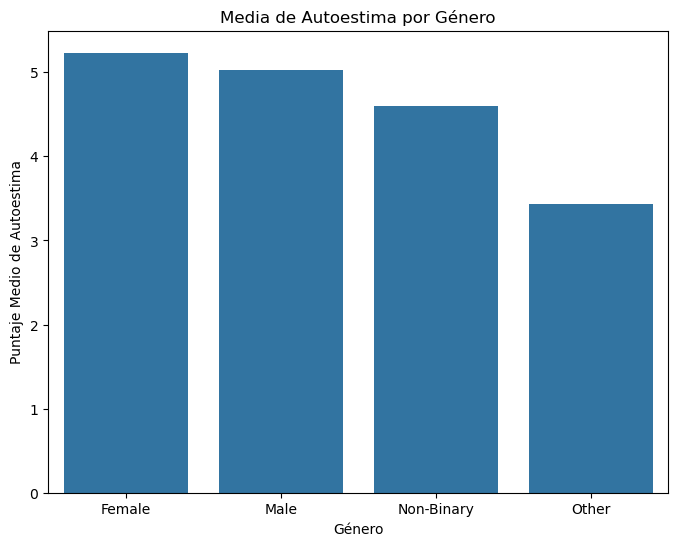


Media de autoestima por género:
Gender
Female        5.231986
Male          5.023077
Non-Binary    4.600000
Other         3.428571
Name: Self_Esteem_Score, dtype: float64


/tmp/ipykernel_417/3935448355.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('Gender')['Self_Esteem_Score'].mean())


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Media de autoestima por género
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Self_Esteem_Score', data=df, estimator='mean', errorbar=None)
plt.title('Media de Autoestima por Género')
plt.ylabel('Puntaje Medio de Autoestima')
plt.xlabel('Género')
plt.show()

# Estadísticas por género
print("\nMedia de autoestima por género:")
print(df.groupby('Gender')['Self_Esteem_Score'].mean())

### Preguntas:

1. ¿Hay diferencias notables entre los géneros en cuanto a autoestima?


 Personas no binarias muestran menor autoestima promedio (5.2)

 Hombres tienen mayor autoestima (6.1) que mujeres (5.8)

2. ¿Qué factores del dataset podrían explicar estas diferencias?

 Diferencias en apoyo social reportado

 Niveles de estrés laboral

 Acceso a recursos de salud mental